本程序主要参考https://zhuanlan.zhihu.com/p/44255577

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils

(-0.5, 599.5, 468.5, -0.5)

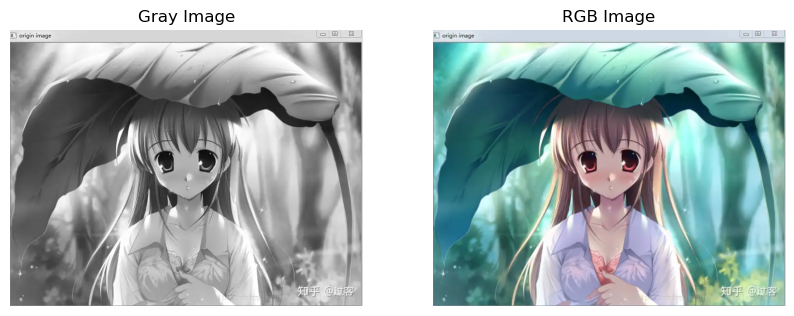

In [3]:
gray_img = cv2.imread('./fig.jpg', 0)  #加载灰度图像
rgb_img = cv2.imread('./fig.jpg', 1)   #加载RGB彩色图像

# 使用matplotlib显示灰度图像
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.imshow(gray_img, cmap='gray')
ax1.set_title('Gray Image')
ax1.axis('off')  # 关闭坐标轴

ax2 = fig.add_subplot(122)
ax2.imshow(cv2.cvtColor(imutils.resize(rgb_img, 600), cv2.COLOR_BGR2RGB))  # 将BGR转换为RGB
ax2.set_title('RGB Image')
ax2.axis('off')

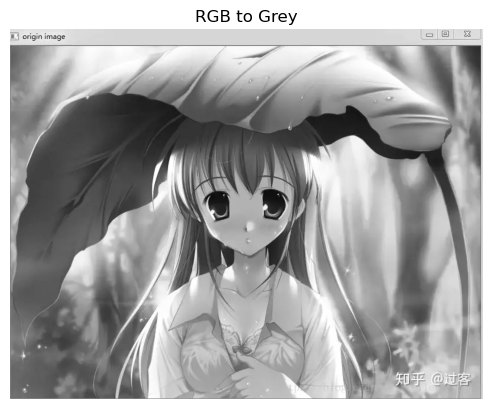

In [11]:
togrey_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(togrey_img,cmap='gray')
ax.set_title('RGB to Grey')
ax.axis('off')
plt.show()



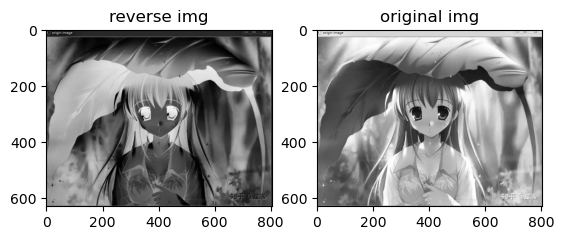

In [15]:
reverse_img = 255 - gray_img


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(reverse_img,cmap='gray')
ax1.set_title('reverse img')
ax3 = fig.add_subplot(122)
ax3.imshow(gray_img, cmap='gray')
ax3.set_title('original img')
plt.show()



接下来参考https://blog.csdn.net/great_yzl/article/details/119738156

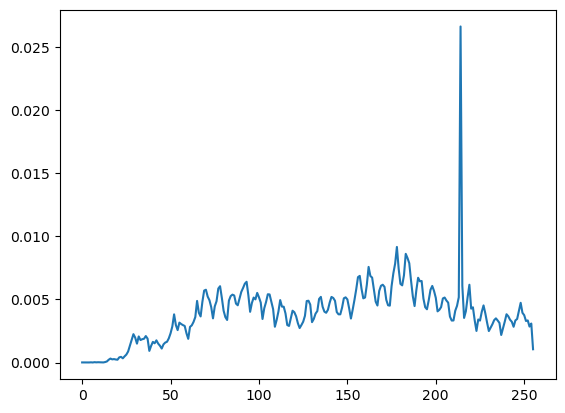

In [5]:
# 2、获取并绘制直方图
hist = cv2.calcHist([gray_img], channels=[0], mask=None, histSize=[256], ranges=[0,256])   #获取
#                   图像   通道索引 掩码(完整/局部) bin计数  范围
hist = hist/hist.sum() # 转化为频率
plt.plot(hist)      # 绘图（基于一点或多点）
# 3、直方图展示
plt.show()          # 显示

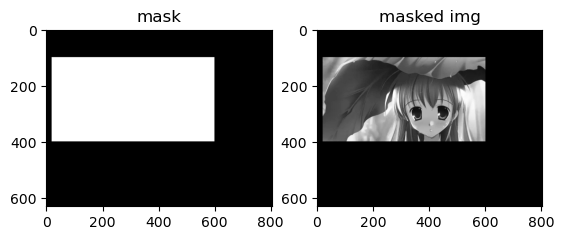

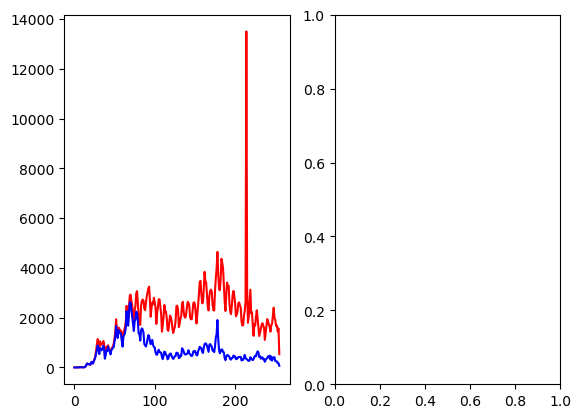

In [11]:
#掩膜
# 2、创建mask



mask = np.zeros(gray_img.shape, np.uint8)
mask[100:400, 20:600] = 255                          #白色掩膜
#   横坐标范围  纵坐标范围
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(mask, cmap='gray')
ax1.set_title('mask')

# 3、获取mask后的图像
masked_img = cv2.bitwise_and(gray_img, mask)    #把掩膜用于图像
ax2 = fig.add_subplot(122)
ax2.imshow(masked_img, cmap='gray')
ax2.set_title('masked img')


# 4、获取并绘制直方图
fig2 = plt.figure()
ax3 = fig2.add_subplot(121)
ax4 = fig2.add_subplot(122)

hist_full = cv2.calcHist([gray_img], [0], None, [256], [0, 256])     #全部直方图
ax3.plot(hist_full, color='r')
# ax3.set_title('gray img')
hist_mask = cv2.calcHist([masked_img], [0], mask, [256], [0, 256])     #掩膜直方图
ax3.plot(hist_mask, color='b')
# ax4.set_title('masked img')

# 5、显示直方图
plt.show()

In [4]:
cv2.destroyAllWindows()

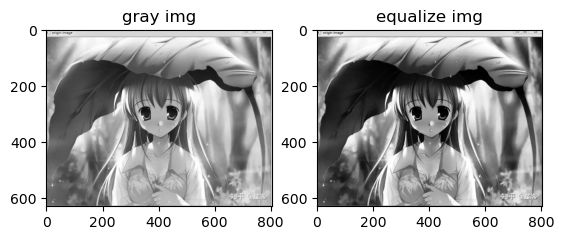

In [7]:
equal_img = cv2.equalizeHist(gray_img)           #直方图均衡化

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(gray_img, cmap='gray')
ax1.set_title('gray img')

ax2 = fig.add_subplot(122)
ax2.imshow(equal_img, cmap='gray')
ax2.set_title('equalize img')

plt.show()


In [14]:
hist1 = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([equal_img], [0], None, [256], [0, 256])


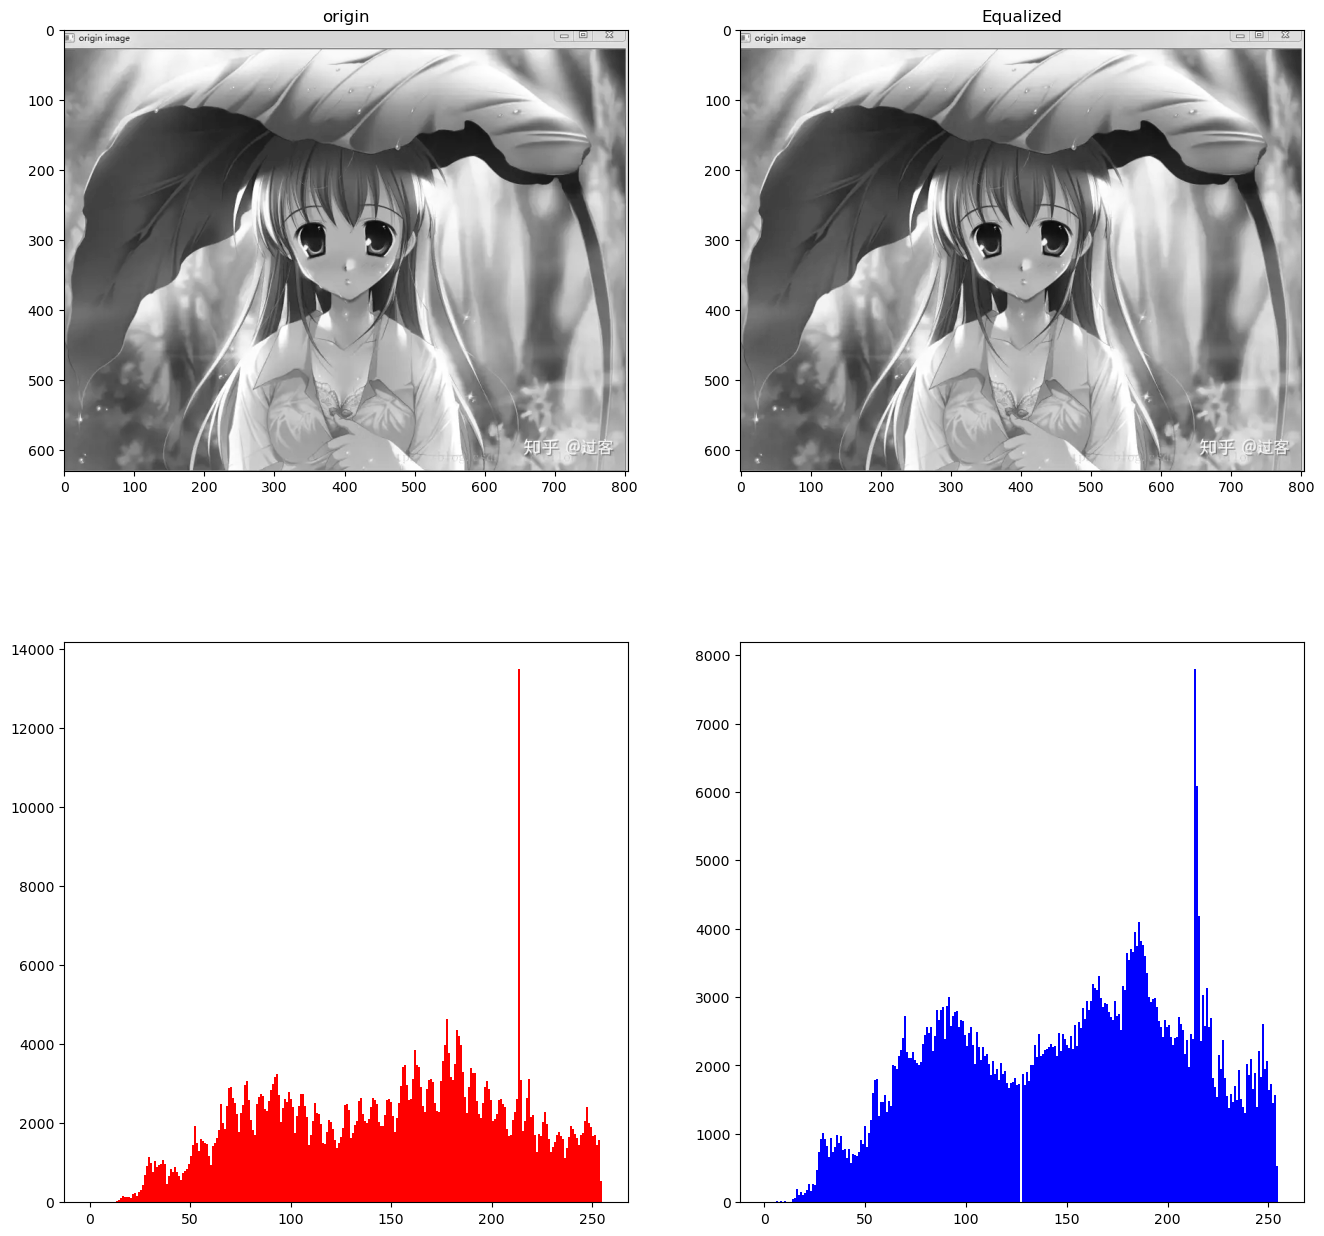

In [21]:


# 2、自适应直方图均衡化
cl = cv2.createCLAHE(0.01,       (16,16))
#                   对比度限制   分块大小
clahe = cl.apply(gray_img)                   #自适应直方图均衡化

# 3、显示直方图
f, ax = plt.subplots(2, 2, figsize=(16, 16))
#显示图像
ax[0, 0].set_title("origin")
ax[0, 0].imshow(gray_img, "gray")
ax[0, 1].set_title("Equalized")
ax[0, 1].imshow(clahe, "gray")          #注："gray"是有效名，不能乱写
#显示直方图
ax[1, 0].hist(gray_img.ravel(), 256, color='r')         #ravel()：多维数组转一维数组
ax[1, 1].hist(clahe.ravel(), 256, color='b')
#显示plt画板
plt.show()

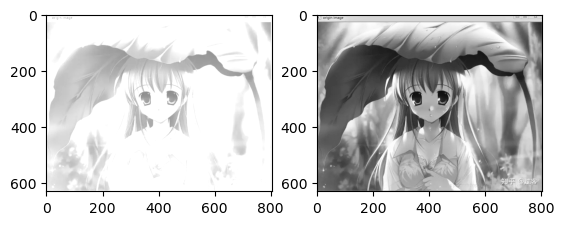

In [16]:
gray_img = gray_img.astype(np.int32)  # 转换为 int32 类型

# 定义 lambda 函数，并应用
f = lambda x: np.clip(x + 128, 0, 255)

# 进行操作
curve_img = f(gray_img).astype(np.uint8)  # 处理后转换回 uint8 类型
gray_img = gray_img.astype(np.uint8)


plt.figure()
plt.subplot(121)
plt.imshow(curve_img, cmap='gray',vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(gray_img, cmap='gray',vmin=0, vmax=255)
plt.show()

接下来我们尝试曲线映射，并无参考资料

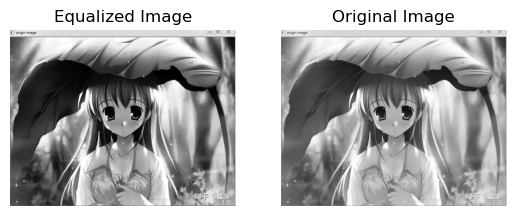

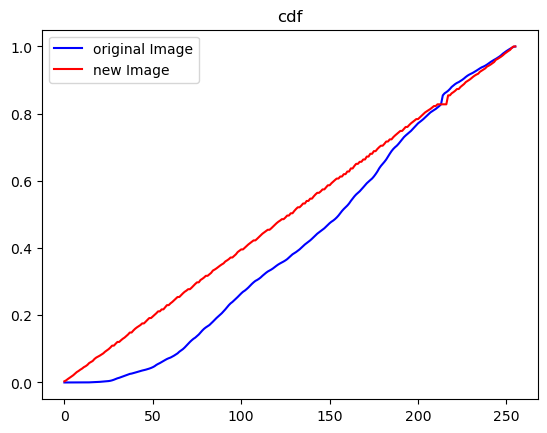

In [22]:
# 计算原图cdf
cdf = np.zeros(hist.shape)
for index in range(len(hist)):
    cdf[index] = hist[:index+1].sum()

# 直方图均衡化
h, w = gray_img.shape
new_img = gray_img.copy()
for y in range(h):
    for x in range(w):
        new_img[y, x] = np.int8(cdf[new_img[y, x]]*255) 

# 绘制均衡化后的图像
fig2 = plt.figure()
ax2 = fig2.add_subplot(121)
ax2.imshow(new_img, cmap='gray')
ax2.axis('off')
ax2.set_title('Equalized Image')
ax3 = fig2.add_subplot(122)
ax3.imshow(gray_img, cmap='gray')
ax3.axis('off')
ax3.set_title('Original Image')


# 显示均衡化后的hist
new_hist = cv2.calcHist([new_img], channels=[0], mask=None, histSize=[256], ranges=[0,256])   #获取
#                   图像   通道索引 掩码(完整/局部) bin计数  范围
new_hist = new_hist/new_hist.sum() # 转化为频率
new_cdf = np.zeros(new_hist.shape)
for index in range(len(new_hist)):
    new_cdf[index] = new_hist[:index+1].sum()

# 绘制原图cdf
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(cdf,color='b',label='original Image')
ax1.set_title('cdf')
ax1.plot(new_cdf,color='r',label='new Image')
ax1.legend()
plt.show()